In [43]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path



EXPORT_PATH_TABLE = Path("../../papers/Distillation-MI-ICLR/tables/img/")
EXPORT_PATH_FIG = Path("../../papers/Distillation-MI-ICLR/figures/img/")

# Make sure the folders exist
EXPORT_PATH_TABLE.mkdir(parents=True, exist_ok=True)
EXPORT_PATH_FIG.mkdir(parents=True, exist_ok=True)


In [54]:
DATA_PATH = Path("../non_sync/bani_results/vision_fig1.csv")

df = pd.read_csv(DATA_PATH)

df = df[~df['Task'].str.contains('STL10')]

In [55]:
df['Strategy'] = df['Teacher'].apply(lambda x: "Single" if "Multi" not in x else 'Multi')

In [56]:

df.columns
# Teacher, Task, ACC

Index(['Teacher', 'Task', 'ACC', 'Strategy'], dtype='object')

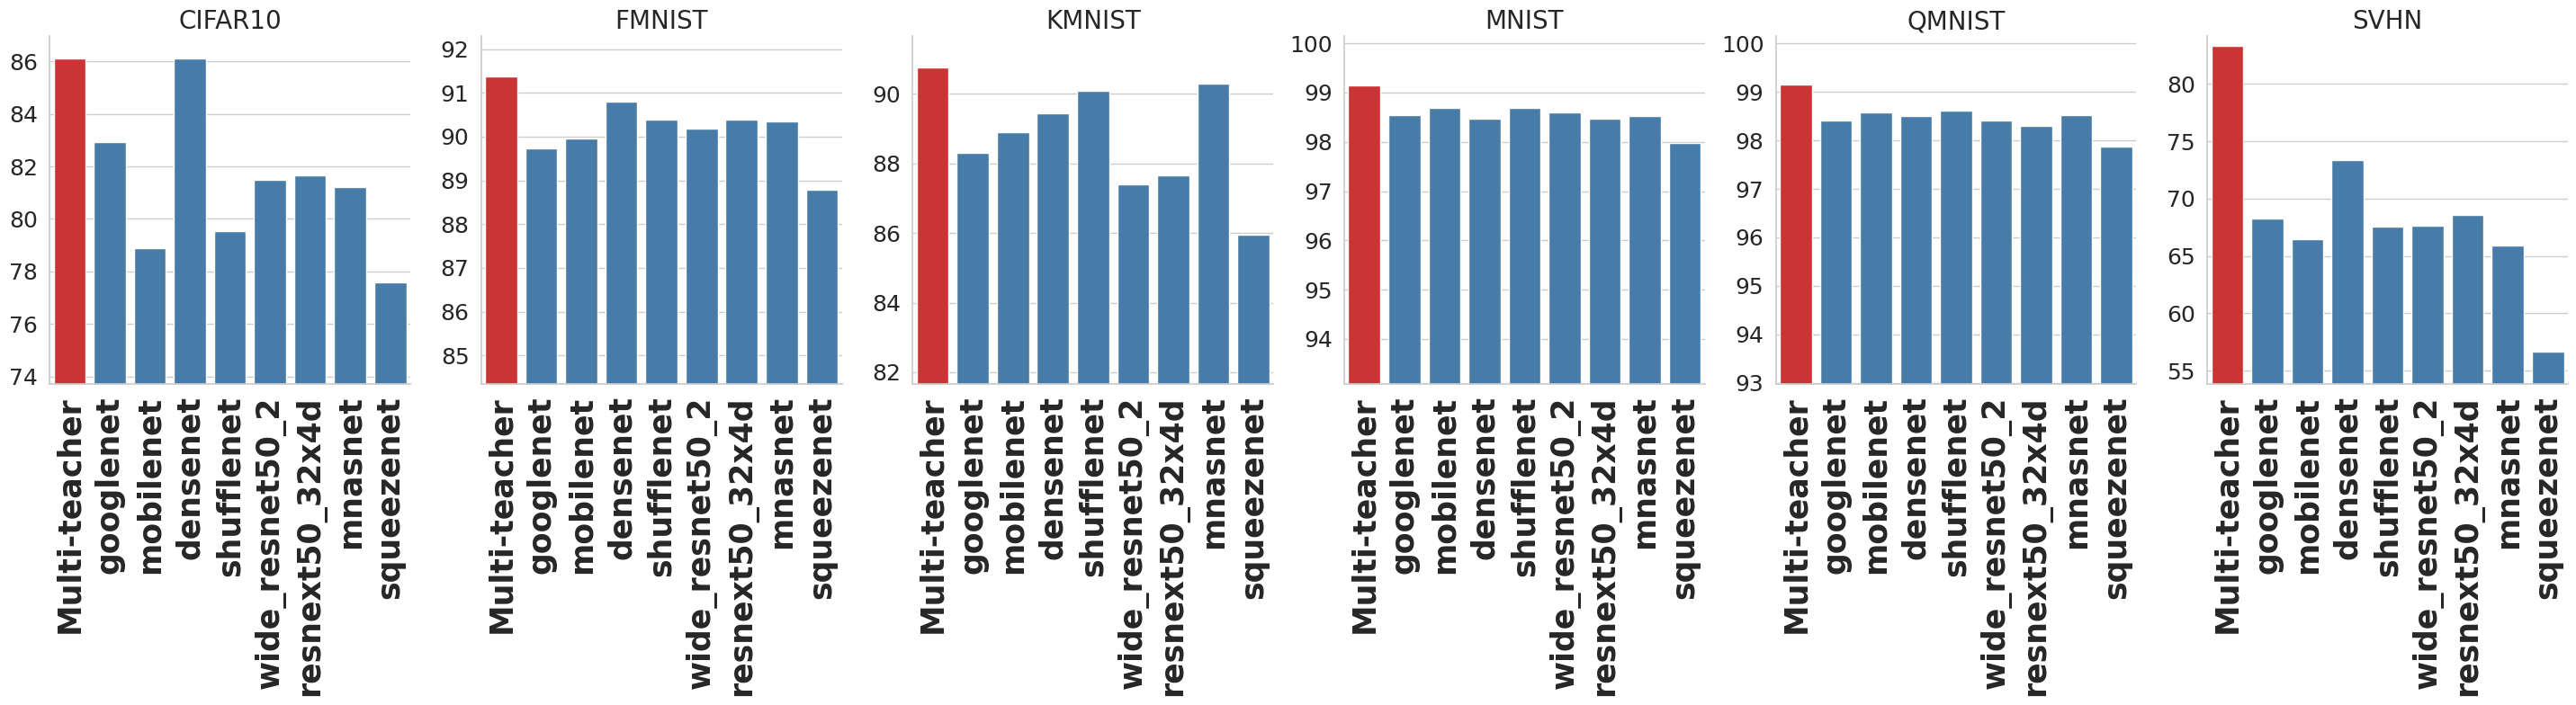

In [65]:

sns.set(style='whitegrid')


df = df.sort_values('Task')
g = sns.catplot(x='Teacher', y='ACC', data=df, col='Task', kind='bar', sharey=False, hue='Strategy', legend=False, height=8, aspect=0.6, palette='Set1')

g.set_titles(template='{col_name}', fontweight='bold')
# title template

axes = g.axes.flatten()

for k, (name, group) in enumerate(df.groupby('Task')):
    mmin, mmax = group['ACC'].min(), group['ACC'].max()
    
    axes[k].set_ylim(mmin - 0.05 *mmin, mmax + 0.01 * mmax)
    # rotate x labels
    for item in axes[k].get_xticklabels():
        item.set_rotation(90)
        
    # make x labels bigger
    for item in axes[k].get_xticklabels():
        item.set_fontsize(25)
        item.set_fontweight('bold')
        
    # make y labels bigger
    for item in axes[k].get_yticklabels():
        item.set_fontsize(18)
        
    # remove x label
    axes[k].set_xlabel('')
    # remove y label
    axes[k].set_ylabel('')
        
        
    
    # make title bigger
    axes[k].set_title(axes[k].get_title(), fontsize=20)




# export save
g.fig.tight_layout()

plt.savefig(EXPORT_PATH_FIG / "img_single_teacher.png", dpi=300)
